<a href="https://colab.research.google.com/github/renatocosta1/Projetos---Turing/blob/main/Projeto_2_Limpeza%2C_An%C3%A1lise_e_Predi%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dividindo em três seções assim intituladas (Limpeza de Dados, Análise de Dados e Predição de Dados), este segundo projeto, além de buscar cumprir o proposto, também apresenta experimentações e testes sobre o conteúdo visto, assim apresentando aplicações e testes dos códigos conscientemente insurgindo dos objetivos estipulados. 

Esse comportamento é feito, pois objetiva explicitar, mais do que apenas a noção de aplicação dos códigos, o desenvolvimento da noção de explicitar o que é válido, aceitável e coerente para cada caso, consolidando assim o entendimento de cada usabilidade e planejamento.  

Afinal, embora predominantemente com questões numéricas e lógicas de programação, o aprendizado não sintetiza apenas a trasnferência de conhecimentos, mas, sim, a criação de possibilidades e habilidades, assim parafraseando Paulo Freire aprendendo na medida em que ensino ao perceber o que é ou não relevante para o aqui estipulado.

Enfim, dentre as palavras aqui esboçadas, apesar de superficialmente descritas, projeta-se a busca de uma limpeza, análise e predição de dados. 

# Limpeza de Dados

## Importação das Bibliotecas e criação do DataFrame

Iniciei importando as bibliotecas mais relevantes para a análise e limpeza aqui objetivadas, além de ter criado os DataFrames a partir dos arquivos oferecidos em formato .csv.

Primeiramente, aponto que os dados aqui serão limpos e analisados separadamente, sendo um dataset (nomeado dftr) de treino e um de teste (intitulado dfte).

Em segunda análise, cabe destacar que, sendo um modelo do Kaggle, o dfte terá apenas limpeza e análise, visto que os modelos de predição, pela já presença da coluna "target", serão feitos no chamado dftr.

Outrosism, sobre a limpeza, sintetizo que será dada principalmente pela atenção às colunas com seus respectivos data types, além da verificação de sentido dentre elas  (por exemplo, para colunas categóricas, observando se os valores únicos fazem sentido e, para numéricas, percebendo sempre se os valores mínimos e máximos das variáveis numéricas fazem sentido para cada coluna).


Para index, em ambos, estipulei a primeira coluna e imprimi as cinco primeiras linhas de cada dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dftr = pd.read_csv("train2.csv", index_col=0)
dftr.head(5)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
dfte = pd.read_csv("test.csv", index_col=0)
dfte.head(5)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
enrollee_id,,,,,,,,,,,,
32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


## Procedimentos da Limpeza e Descrição do DataFrame

Primeiramente, removi duplicatas presentes nos dfs, assim como os valores NaN.

In [5]:
dftr = dftr.drop_duplicates()
dftr = dftr.dropna()
dfte = dfte.drop_duplicates()
dfte = dfte.dropna()

Depois, para começar a perceber quais colunas devo limpar, explicitei as informações de cada dataset, além de suas informações trazidas pelo *unique*.

In [6]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 29725 to 24576
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    8924 non-null   object 
 1   city_development_index  8924 non-null   float64
 2   gender                  8924 non-null   object 
 3   relevent_experience     8924 non-null   object 
 4   enrolled_university     8924 non-null   object 
 5   education_level         8924 non-null   object 
 6   major_discipline        8924 non-null   object 
 7   experience              8924 non-null   object 
 8   company_size            8924 non-null   object 
 9   company_type            8924 non-null   object 
 10  last_new_job            8924 non-null   object 
 11  training_hours          8924 non-null   int64  
 12  target                  8924 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 976.1+ KB


In [7]:
dftr.describe(include=["object"])

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924
unique,116,3,2,3,3,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,2399,8043,7820,7564,6224,7958,1859,1983,6765,3830


In [8]:
dfte.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 27385 to 12215
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    1018 non-null   object 
 1   city_development_index  1018 non-null   float64
 2   gender                  1018 non-null   object 
 3   relevent_experience     1018 non-null   object 
 4   enrolled_university     1018 non-null   object 
 5   education_level         1018 non-null   object 
 6   major_discipline        1018 non-null   object 
 7   experience              1018 non-null   object 
 8   company_size            1018 non-null   object 
 9   company_type            1018 non-null   object 
 10  last_new_job            1018 non-null   object 
 11  training_hours          1018 non-null   int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 103.4+ KB


In [9]:
dfte.describe(include=["object"])

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,1018,1018,1018,1018,1018,1018,1018,1018,1018,1018
unique,88,3,2,3,3,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,264,923,874,845,696,896,233,235,775,431


### Dados Categóricos

Assim, percebo a existência de colunas com dados categóricos (0, 2, 3, 4, 5,  e 9) que, como a seguir será elucidado, não serão limpas.

Em ambos  dfs, primeiramente, aponto a não necessidade de limpar as colunas de "cidade" e "experiência relevante" , porque elas são categorizadas como string, além de que, a grosso modo, não é possível perceber irregularidade ou dado que possa prejuidicar aqui o desejado.

Ainda, percebendo que em ambos os *unique* de gênero são valores compatíveis com a categoria - como os códigos a seguir demonstram - essas colunas também não serão limpas. 

In [10]:
dftr["city_development_index"].unique()

array([0.776, 0.767, 0.762, 0.92 , 0.913, 0.926, 0.843, 0.624, 0.91 ,
       0.923, 0.666, 0.794, 0.924, 0.754, 0.939, 0.887, 0.865, 0.855,
       0.827, 0.893, 0.884, 0.866, 0.802, 0.55 , 0.897, 0.925, 0.896,
       0.878, 0.693, 0.698, 0.949, 0.789, 0.903, 0.727, 0.64 , 0.516,
       0.579, 0.804, 0.743, 0.915, 0.899, 0.836, 0.89 , 0.795, 0.682,
       0.558, 0.796, 0.895, 0.769, 0.84 , 0.691, 0.742, 0.555, 0.738,
       0.527, 0.921, 0.856, 0.479, 0.73 , 0.764, 0.68 , 0.689, 0.848,
       0.722, 0.763, 0.74 , 0.766, 0.788, 0.83 , 0.78 , 0.898, 0.847,
       0.556, 0.512, 0.725, 0.739, 0.563, 0.775, 0.647, 0.701, 0.645,
       0.824, 0.745, 0.448, 0.735, 0.518, 0.649, 0.781, 0.625, 0.493,
       0.487])

In [11]:
dftr["city_development_index"].describe()

count    8924.000000
mean        0.844407
std         0.116232
min         0.448000
25%         0.794000
50%         0.910000
75%         0.920000
max         0.949000
Name: city_development_index, dtype: float64

In [12]:
pd.Series(dftr.gender.unique())

0      Male
1    Female
2     Other
dtype: object

In [13]:
pd.Series(dfte.gender.unique())

0      Male
1    Female
2     Other
dtype: object

Explicitando os *unique* de "Tipo de curso universitário matriculado", de "Nível de educação do candidato", de "Tipo de empregador" e de "Major principal de educação", percebo também valores condizentes às categorias e assim justifico suas não limpezas.  

In [14]:
pd.Series(dftr.enrolled_university.unique())

0       no_enrollment
1    Part time course
2    Full time course
dtype: object

In [15]:
pd.Series(dfte.enrolled_university.unique())

0       no_enrollment
1    Part time course
2    Full time course
dtype: object

In [16]:
pd.Series(dftr.education_level.unique())

0    Graduate
1     Masters
2         Phd
dtype: object

In [17]:
pd.Series(dfte.education_level.unique())

0     Masters
1    Graduate
2         Phd
dtype: object

In [18]:
pd.Series(dftr.major_discipline.unique())

0               STEM
1         Humanities
2    Business Degree
3              Other
4           No Major
5               Arts
dtype: object

In [19]:
pd.Series(dfte.major_discipline.unique())

0               STEM
1    Business Degree
2               Arts
3           No Major
4         Humanities
5              Other
dtype: object

In [20]:
pd.Series(dftr.company_type.unique())

0                Pvt Ltd
1         Funded Startup
2    Early Stage Startup
3          Public Sector
4                    NGO
5                  Other
dtype: object

In [21]:
pd.Series(dfte.company_type.unique())

0                Pvt Ltd
1                  Other
2    Early Stage Startup
3                    NGO
4         Funded Startup
5          Public Sector
dtype: object

### Dados Numéricos

Sobre os Dados Numéricos, comento, na realidade, que alguns deles são categóricos, mas apenas aqui serão substituídos - ou terão certos valores retirados - para possibilitar a inserção nas análises e nas plotagens de gráficos. 

Por exemplo, os valores "<1" e ">20" de "Experiência" serão substituídos conforme os códigos a seguir, visto que tal mudança apenas ajudará na predição de dados e não prejudicará a leitura destes, porque já apenas apontar como experiência "<1" não distingue a exatidão de quanto tempo, nem diferencia um candidato do outro perante tal categoria. Assim, bem como ocorre em ">20", eles parecem estar nivelados sobre tal coluna e a substituição nada disso alterará. 

Ainda, como será explicado adiante, essas alterações só ocorrerão no dftr e, ratifico, que essa alteração é puramente adaptativa para os gráficos e os resultados serão verificados se a substituição tem lógica para a *feature* ou não.

In [22]:

dftr["experience"].replace(">20", "20", inplace=True) #elucidando que tal inplace serve para ele alterar já no df, não criando outro para isso
dftr["experience"].replace("<1", "1", inplace=True) 


O mesmo será feito com *last_new_job*, com os valores de ">4" e "never" assim substituídos. 

In [23]:
dftr["last_new_job"].replace(">4", "4", inplace=True) 
dftr["last_new_job"].replace("never", "0", inplace=True) 

Assim como farei com a coluna de *company_size*, também a seguir tendo os valores substituídos e seguindo a mesma lógica, apesar de que depois ela será verificada se coerente, como já comentado.


In [24]:
dftr["company_size"].replace("50-99", "99", inplace=True) 
dftr["company_size"].replace("<10", "10", inplace=True)
dftr["company_size"].replace("5000-9999", "5000", inplace=True) 
dftr["company_size"].replace("1000-4999", "1000", inplace=True)  
dftr["company_size"].replace("10/49", "49", inplace=True) 
dftr["company_size"].replace("100-500", "250", inplace=True) 
dftr["company_size"].replace("10000+", "10001", inplace=True) 
dftr["company_size"].replace("500-999", "999", inplace=True) 

Dessa forma, como explicitado e exclusivamente com a intenção de aplicar análises, será possível categorizar essas colunas como dados numéricos e, para corroborar essa categorização, os seguintes códigos são executados com tais colunas. 

In [25]:
dftr['experience'] = dftr["experience"].astype('int')

In [26]:
dftr['last_new_job'] = dftr["last_new_job"].astype('int')

In [27]:
dftr['company_size'] = dftr["company_size"].astype('int')

Por fim, sobre os valores de Horas de treinamento concluídas, percebo, a partir da descrição, valores de máximo e mínimo aceitáveis, então aponto que não limparei nem alterarei essa coluna, apenas a categorizarei como *int* para encaixar em alguns modelos de predição: comportamento realizado também para *target*. 

In [28]:
dftr["training_hours"].describe()

count    8924.000000
mean       65.185567
std        60.289173
min         1.000000
25%        23.000000
50%        47.000000
75%        88.000000
max       336.000000
Name: training_hours, dtype: float64

In [29]:
dftr['training_hours'] = dftr["training_hours"].astype('int')

In [30]:
dftr['target'] = dftr["target"].astype('int')

Reitero, entretanto, que as substituições aqui foram realizadas apenas no dftr, porque na realidade já se tem ciência que essas substituições muitas vezes não se mostram válidas ou embasadas para certos dados. Por isso, repito que aqui as mudanças foram feitas para os valores de um dataframe, que depois, mais coerentemente para os modelos de predição, terá seus valores naturalmente categóricos assim mantidos e codificados para aplicação nos modelos de predição.

# Análise de Dados

A análise aqui não será tão detalhada quanto outrora, visto que, objetivando realizar uma análise rápida, tem-se como finalidade a obtenção de insights interessantes, como por exemplo quais as relações e correlações entre as colunas, e quais categorias mais se relacionam com a target (já antecedida que será se a pessoa está buscando ou não mudar de emprego). 

Para isso, todas as colunas, por também apresentarem pouca diversidade de valores como o *dftr.describe(include=["object"])* já apresentou, terão seus valores categóricos substituídos por valores numéricos, concomitantemente que serão padronizadas como do tipo *int*: atitude já feita em algumas *features*, como a seção anteriora mostrou, e ressaltando esse remodelamento apenas por questões de análise. 

Afinal, esse comportamento é aqui adotado pela existência de dois datasets. Por isso, todas as colunas serão transformadas em numéricas apenas no dataset de treino (dftr), porque facilita-se a organização dos gráficos, e é esse df que será encaixado nos modelos de predição: os quais, por exigirem em sua maioria dados numéricos, justificam também a padronização das colunas como numéricas. 

Enfim, seguem os códigos realizando tais noções com as colunas ainda não alteradas. 

In [31]:
#relembrando que o inplace utilizado em tais códigos é não apenas para verificar, mas já realizar as substituições

In [32]:
dftr["enrolled_university"].replace("no_enrollment", "0", inplace=True) 
dftr["enrolled_university"].replace("Part time course", "1", inplace=True)
dftr["enrolled_university"].replace("Full time course", "2", inplace=True)

In [33]:
dftr['enrolled_university'] = dftr["enrolled_university"].astype('int')

In [34]:
dftr["gender"].replace("Male", "0", inplace=True) 
dftr["gender"].replace("Female", "1", inplace=True)
dftr["gender"].replace("Other", "2", inplace=True)

In [35]:
dftr['gender'] = dftr["gender"].astype('int')

In [36]:
dftr["relevent_experience"].replace("Has relevent experience", "0", inplace=True) 
dftr["relevent_experience"].replace("No relevent experience", "1", inplace=True)

In [37]:
dftr['relevent_experience'] = dftr["relevent_experience"].astype('int')

In [38]:
dftr["education_level"].replace("Graduate", "0", inplace=True) 
dftr["education_level"].replace("Masters", "1", inplace=True)
dftr["education_level"].replace("Phd", "2", inplace=True)

In [39]:
dftr["education_level"] = dftr["education_level"].astype("int")

In [40]:
dftr["major_discipline"].replace("STEM", "0", inplace=True)
dftr["major_discipline"].replace("No Major", "1", inplace=True)
dftr["major_discipline"].replace("Humanities", "2", inplace=True)
dftr["major_discipline"].replace("Business Degree", "3", inplace=True)
dftr["major_discipline"].replace("Other", "4", inplace=True)
dftr["major_discipline"].replace("Arts", "5", inplace=True)

In [41]:
dftr["major_discipline"] = dftr["major_discipline"].astype("int")

In [42]:
dftr["company_type"].replace("Pvt Ltd", "0", inplace=True)
dftr["company_type"].replace("Funded Startup", "1", inplace=True)
dftr["company_type"].replace("Early Stage Startup", "2", inplace=True)
dftr["company_type"].replace("Public Sector", "3", inplace=True)
dftr["company_type"].replace("NGO", "4", inplace=True)
dftr["company_type"].replace("Other", "5", inplace=True)


In [43]:
dftr["company_type"] = dftr["company_type"].astype("int")

Depois dessas transformações, adiciono outra vantagem de fazer tais substituições apenas no dftr, porque apenas o *heatmap* deste estará um pouco mais poluído, como é possível ver a seguir. 

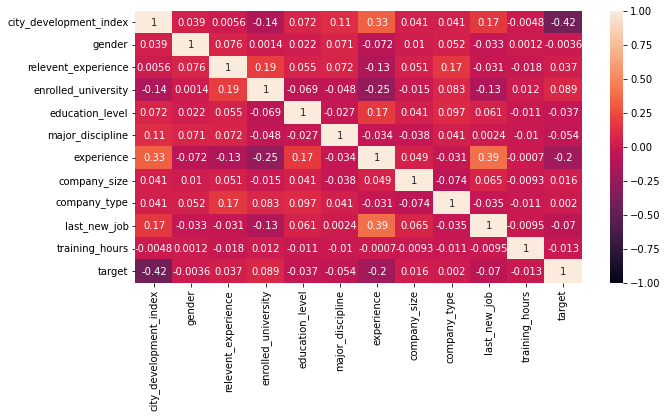

In [44]:
plt.figure(figsize=(10,5))
sns.heatmap(dftr.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

Assim, percebendo que, como o dataset possui diversas *features* (colunas), algumas não foram bem pensadas de serem transformadas em numéricas (informação da qual já se possuía ciência) por exemplo por sua falta de correlação como visto no *heatmap* anterior.

Dessa forma, destaco que tal *heatmap* será comentado e refletido a seguir, cogitando sobre a relevância de este ter sido feito e seus valores apresentados. 

Outrossim,  para trazer insights interessantes, ele será analisando conforme as correlações oferecidas e com novos gráficos e visualizações para as features. Por conseguinte, apontarei e justificarei o uso de somente algumas *features* para a predição, ainda apresentando, na seção para tal, a diferença que a seletividade de algumas colunas, quando comparadas com todas, traz em relação à acurácia.

Para mais, daí reconhece-se a relevância de possuir dois datasets diferentes, porque alguns gráficos, para melhor visualização, serão plotados com base no dfte, visto que são valores semelhantes ao dftr, mas apresentam nominalmente as classes.

Por exemplo, a coluna do gênero no dftr agora está caracterizada com os gêneros numerizados como 0, 1 e 2, porém, observemos então a mesma feature para o outro df.

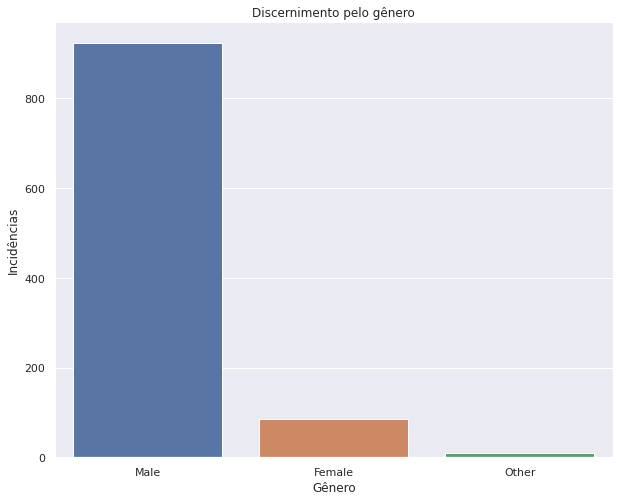

In [45]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid") 
sns.countplot(x=dfte["gender"])
plt.title("Discernimento pelo gênero")
plt.xlabel("Gênero")
plt.ylabel("Incidências")
plt.show()

Percebo que, além de estar mais fácil de visualizar pela diferenciação de Male, Female e Other, essa coluna não se faz tão pertinente de ser aplicada ao modelo de previsão não só pela correlação baixa com outras colunas, mas também pela distribuição irregular do gênero. A irregularidade também aqui é apontada para a feature *city*, assim indicando sua não usabilidade para uma das predições finais. 

Assim, abordando outras colunas que não serão utilizadas pelo menos nos meus modelos de predição, comento sobre as features de *relevent_experience*, *enrolled_university*, *company_size* *education_level*, a seguir plotadas em gráficos e, para diversificação, em um histograma com a linha KDE e em um boxplot.

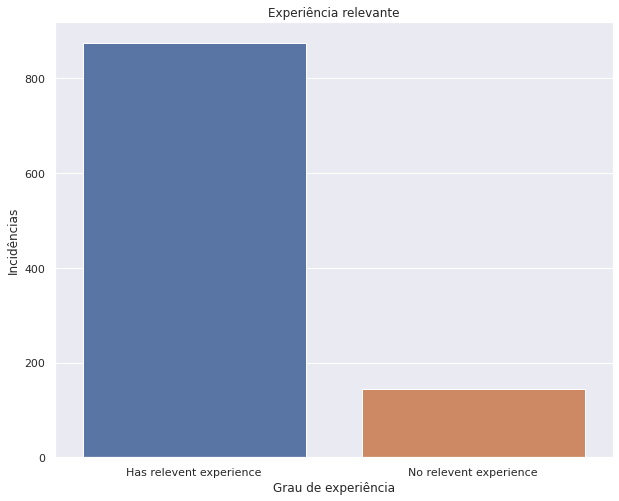

In [46]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid") 
sns.countplot(x=dfte["relevent_experience"])
plt.title("Experiência relevante")
plt.xlabel("Grau de experiência")
plt.ylabel("Incidências")
plt.show()

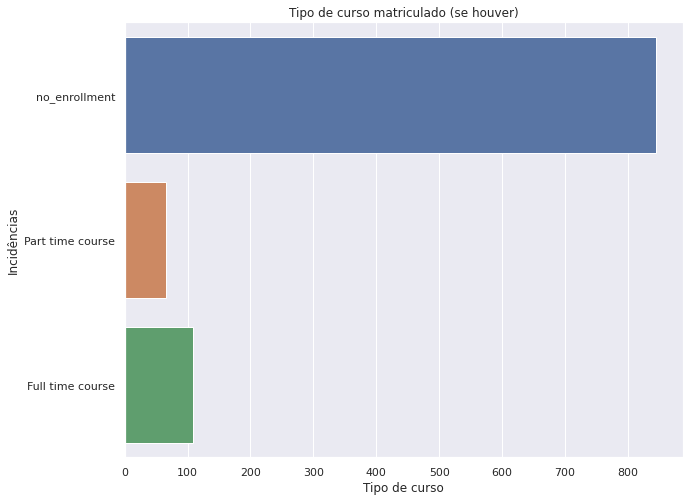

In [47]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid") 
sns.countplot(y=dfte["enrolled_university"])
plt.title("Tipo de curso matriculado (se houver)")
plt.xlabel("Tipo de curso")
plt.ylabel("Incidências")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


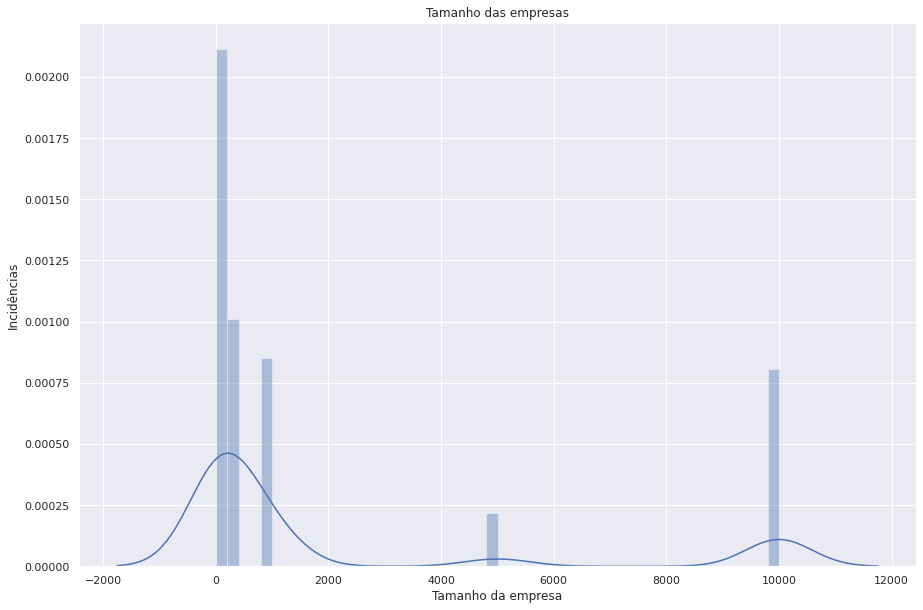

In [48]:
plt.figure(figsize=(15, 10))
sns.set_theme(style="darkgrid") 
sns.distplot(x=dftr["company_size"])
plt.title("Tamanho das empresas")
plt.xlabel("Tamanho da empresa")
plt.ylabel("Incidências")
plt.show()

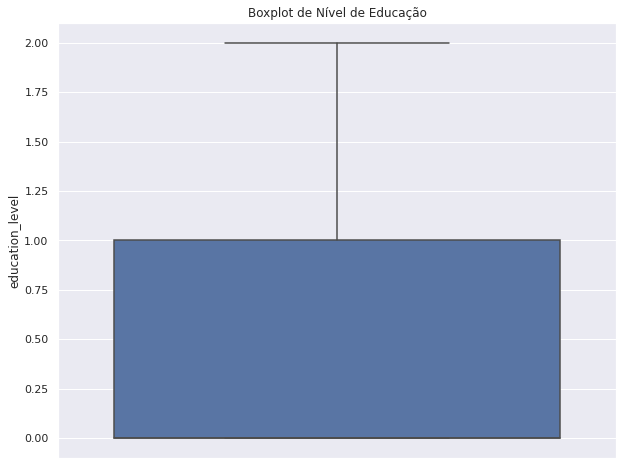

In [49]:
plt.figure(figsize=(10,8))
sns.boxplot(y=dftr["education_level"])
plt.title("Boxplot de Nível de Educação")
plt.show()

Após tais visualizações, percebe-se que as quatro categorias não serão aqui utilizadas para predição, porque, além de não bem adaptadas como modelos numéricos, depreende-se que, como bem visível no gráfico de barras, há uma categoria que se destaca das demais, logo não há como preponderância de relação com a target, ainda corroborado pelos valores vagos e baixos dado pelo *heatmap*.

O mesmo passa com *education_level*, percebendo que, como o segundo quartil (mediana) não está posicionado no centro do retângulo, a distribuição dos níveis de educação é tida como asssimétrica, ressaltando-se níveis de educação do tipo 1 (contabilizada como graduação) como mais da metade da amostra, por isso concluindo a não relevância de tal categoria para a target, porque esta, verificando a grosso modo, não ocorre apenas com estudantes de graduação, não se relacionando com outras colunas: informação também reiterado pelo *heatmap*. 

Abstraindo mais informações relevantes sobre o *heatmap*, comento sobre os altos valores que *city_development_index* possui, por isso já o selecionando para um modelo de predição. 

Especificament, ainda, essa feature correlaciona-se com um valor alto com a coluna *experience* que, por sua vez, mostra-se bem correlacionada também com *last_new_job*: insight interessante e explicável, porque, como será visto no modelo de predição usado para essas colunas, a quantidade de tempo entre um trabalho e outro, adicionada à experiência total em anos do candidato, mostram-se passíveis da tendência de mudança de trabalho ou não aqui determinada como target.  

Para ilustrar e comprovar essa relação, o seguinte gráfico é plotado. 

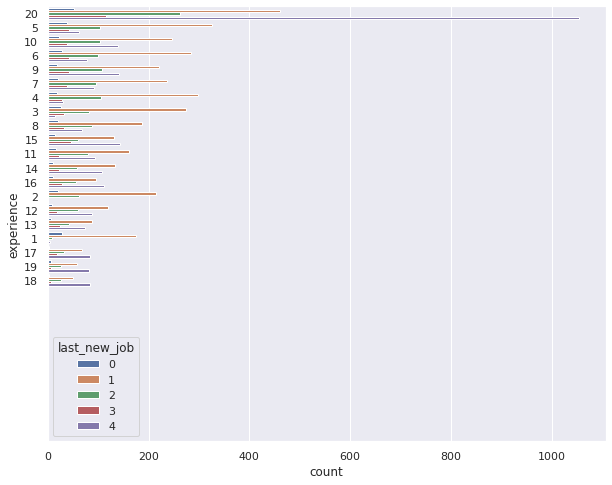

In [50]:
plt.figure(figsize = (10,8))
sns.countplot (y = "experience", hue = "last_new_job", data = dftr, order = dftr["experience"].value_counts().index)
plt.ylim(30.5)
plt.show()

Nele, verifica-se a correlação entre as categorias, porque é possível perceber que valores próximos de experiência total do candidato, como 17, 18 e 19, pairam distribuições semelhantes da categoria expressa por *last_new_job*.

Por exemplo, nesses mesmos números, há predominância de candidatos que não trocaram de trabalho: informação oriunda da maior barra ser do 0, que representa *never* nessa feature. 

Outrossim, o próximo gráfico de dispersão ratifica a correlação, trazendo até similaridade com a target.

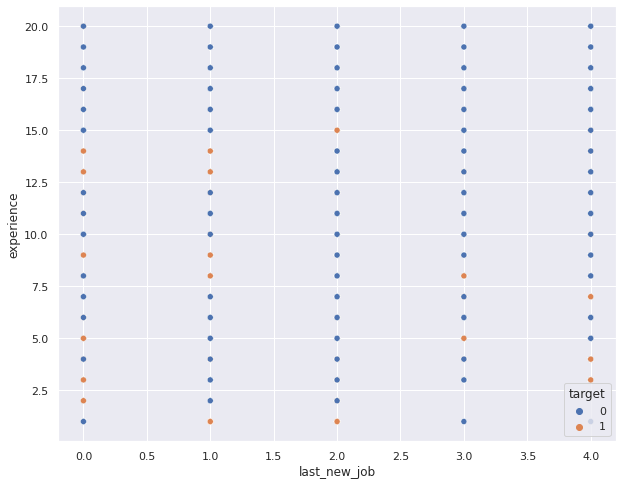

In [51]:
plt.figure(figsize = (10, 8))

sns.scatterplot(x = dftr["last_new_job"], 
                y = dftr["experience"],
                hue = dftr["target"])
plt.show()

Vejamos que, à medida que o valor de *last_new_job* aumenta, embora não exista muita alteração em *experience*, percebe-se a dimininuição de ocorrências de target 1, apontando para a correlação entre as features. 

Por fim, abordando outras colunas relacionadas com a target, comento, além da *company_type* pelo aumento de acurácia obtido, o uso das colunas *major_discipline* e *training_hours* para outro modelo de predição, pois o gráfico abaixo demonstra a equiparação entre essas features, percebendo que majores principais de Artes e Outros (expressos pelos números 4 e 5) tendem a mudar menos de emprego, por isso representando as menores incidências como se vê a seguir. Nesta coluna, portanto, a substituição numérica fez-se relevante, apenas, porém, para questões de análises e geração de conclusões. 

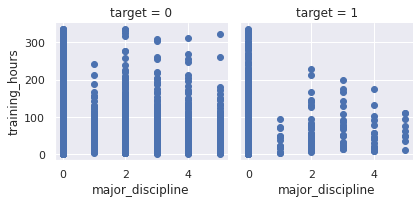

In [52]:
grid = sns.FacetGrid(dftr, col = "target")
grid.map(plt.scatter, "major_discipline", "training_hours")

Desse modo, trazendo mais algumas plotagens fora do que aqui discorrido apenas para ajudar a observar os aspectos gerais do DataFrame, finalizo esta parte de análise, depreendendo alguns insights interessantes de relação entre target e colunas.

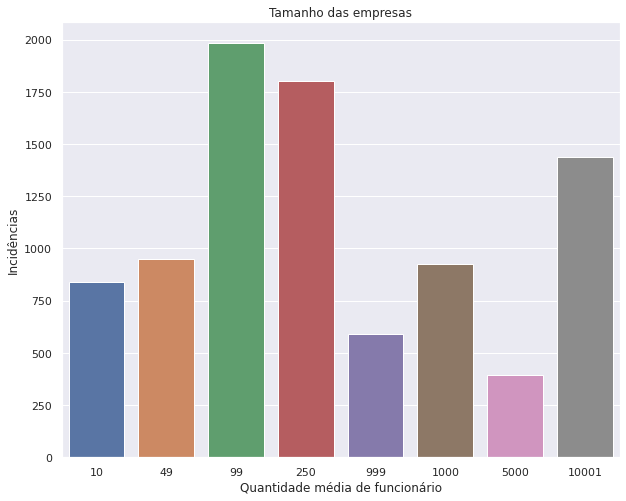

In [53]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid") 
sns.countplot(x=dftr["company_size"])
plt.title("Tamanho das empresas")
plt.xlabel("Quantidade média de funcionário")
plt.ylabel("Incidências")
plt.show()

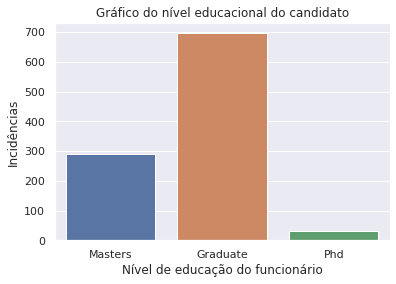

In [54]:
sns.countplot(x=dfte["education_level"])
plt.title("Gráfico do nível educacional do candidato")
plt.xlabel("Nível de educação do funcionário")
plt.ylabel("Incidências")
plt.show()

Agora, com certas colunas já selecionadas e determinadas, vamos construir um modelo que busca predizer se um determinado cientista de dados deseja mudar de emprego ou não, para chegar ao objetivo da predição exigida.

Novamente, contudo, enalteço que a mudança para valores numéricos fica aqui restrita para a análise, já que todas as colunas serão a seguir adaptadas para os modelos de predição, mantendo suas variáveis como categóricas ou numéricas.

# Predição de Dados

Permeando a noção de Machine Learning agora, após limpar os dados e perceber os insights apresentados anteriormente, começarei a usar modelos para predizer se uma determinada pessoa está ou não procurando mudar de emprego, usando assim de aprendizado supervisionado. Além de avaliar se as substituições e seleções de colunas que fiz realmente terão bons êxitos. 

Sobre os dados, usualmente, selecionando um dataset, tem-se 70% dele usado para treino, deixando o 30% para teste, por isso tais valores estão assim contabilizados. 

Finalmente, antes de iniciar realmente a predição, aponto a busca de um modelo "just right", dessa maneira insurgindo de Overfitting ou Underfitting.

Objetivando esse modelo "just right", então, discorre-se sobre o modelo de Regressão Linear, selecionado primeiramente e apontando o quanto tal projeto teve cuidado com métricas e acurácias, pois é justamente pelo baixo valor desta para a Regressão a seguir, que enfatizo a busca sempre de melhores acurácias e precisões, treinando um modelo que obtenha bons resultados para realizar a predição necessária.


Primeiramente, além do *numpy* e do *pandas* já importados, resgato a biblioteca sklearn, por apresentar modelos de predição já prontos, assim como especificados a seguir.

In [55]:
from sklearn.model_selection import train_test_split  # separando o dataset como treino do teste
from sklearn.linear_model import LinearRegression  # modelo que tentarei usar primeiramente

Adapto todas as colunas para que se encaixem nos modelos de predição, usando os seguintes códigos.

In [120]:
pd.get_dummies(dftr, columns=["city_development_index", "city", "experience", "company_size", "last_new_job", "training_hours", "target", "company_type", "major_discipline", 'gender', "relevent_experience", "enrolled_university", "education_level"])


,city_development_index_0.448,city_development_index_0.479,city_development_index_0.487,city_development_index_0.493,city_development_index_0.512,city_development_index_0.516,city_development_index_0.518,city_development_index_0.527,city_development_index_0.55,city_development_index_0.555,city_development_index_0.556,city_development_index_0.5579999999999999,city_development_index_0.563,city_development_index_0.579,city_development_index_0.624,city_development_index_0.625,city_development_index_0.64,city_development_index_0.645,city_development_index_0.647,city_development_index_0.649,city_development_index_0.6659999999999999,city_development_index_0.68,city_development_index_0.682,city_development_index_0.6890000000000001,city_development_index_0.691,city_development_index_0.693,city_development_index_0.698,city_development_index_0.701,city_development_index_0.722,city_development_index_0.725,city_development_index_0.727,city_development_index_0.73,city_development_index_0.735,city_development_index_0.738,city_development_index_0.7390000000000001,city_development_index_0.74,city_development_index_0.742,city_development_index_0.743,city_development_index_0.745,city_development_index_0.754,...,training_hours_306,training_hours_308,training_hours_310,training_hours_312,training_hours_314,training_hours_316,training_hours_320,training_hours_322,training_hours_324,training_hours_326,training_hours_328,training_hours_330,training_hours_332,training_hours_334,training_hours_336,target_0,target_1,company_type_0,company_type_1,company_type_2,company_type_3,company_type_4,company_type_5,major_discipline_0,major_discipline_1,major_discipline_2,major_discipline_3,major_discipline_4,major_discipline_5,gender_0,gender_1,gender_2,relevent_experience_0,relevent_experience_1,enrolled_university_0,enrolled_university_1,enrolled_university_2,education_level_0,education_level_1,education_level_2
enrollee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
29725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0
666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
402,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
27107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
23853,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0
251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
32313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0


Separo os dados de treino e teste, primeiramente criando variáveis com certas colunas - inferidas pelas análises já feitas - e também originando variáveis de predição com todas as outras colunas. 

As variáveis são assim distinguidas para indicar a relação de algumas colunas com acurácia.



In [57]:
X = dftr[["last_new_job", "experience", "city_development_index"]] 

y = dftr['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [121]:
X2 = dftr.drop(["target", "city"], axis=1)

y2 = dftr['target']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3,random_state=42)

In [59]:
lr = LinearRegression() # Crio um modelo de regressão linear

lr.fit(X_train, y_train)

LinearRegression()

Aparentemente o modelo já foi treinado e executado, agora, então, começarei a verificar sua predição e metrificar seus resultados, por conseguinte importando *mean_squared_error* e *r2_score*, em primeiro plano. 

In [60]:
y_test_predict = lr.predict(X_test)

In [61]:
y_test_predict

array([0.17339921, 0.05359152, 0.24272457, ..., 0.19734795, 0.10388724,
       0.07229729])

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [63]:
# avaliando, agora, o modelo de Regressão nos dados de treino
y_train_predict = lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)


print("Perfomance do modelo para os dados de treino")
print("--------------------------------------")
print(f'RMSE: {rmse}')
print(f'R2 score: {r2}')
print("\n")

# avaliando o modelo nos dados de teste
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("Perfomance do modelo para os dados de teste")
print("--------------------------------------")
print(f'RMSE: {rmse}')
print(f'R2 score: {r2}')
print("\n")

Perfomance do modelo para os dados de treino
--------------------------------------
RMSE: 0.33468648021139663
R2 score: 0.1827715558767773


Perfomance do modelo para os dados de teste
--------------------------------------
RMSE: 0.34076418455244495
R2 score: 0.178097817880988




Percebo que, sabendo da necessidade de possuir o R2 perto de 1, esse modelo não foi aqui bem aplicado nem é tão aceitável, porque, embora possua um RMSE baixo, o valor do R2 não está no esperado.

Assim, retomando este projeto também como treino e aprendizagem de seleção de modelos ou não, seguirei agora tentando utilizar o KNN - algoritmo de aprendizado supervisionado embasado 
na similaridade entre novos dados e os dados de treinamento, a qual é dada pela distância dos elementos.

Por isso, os seguintes códigos são executados.

In [64]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.4, max_features=0.5)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [158]:
k_range = range(1, 14)
scores = {}
scores_list = []
for k in k_range:
  KNN_colunas_selecionadas = KNeighborsClassifier(n_neighbors = k)
  KNN_colunas_selecionadas.fit(X_train, y_train)
  y_predict = KNN_colunas_selecionadas.predict(X_test)
  scores[k] = accuracy_score(y_test, y_predict)
  scores_list.append(accuracy_score(y_test, y_predict))

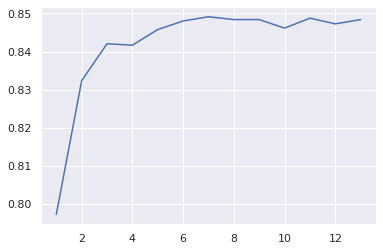

In [67]:
plt.figure #gráfico feito para identificar o melhor valor de K (único hiperparâmetro, que sempre precisa ser um número inteiro, de tal modelo)
plt.plot(k_range, scores_list)

Percebo, assim, que o melhor valor de K seria 8: assim o insiro e já apresento as acurácias dos dois modelos.

In [159]:
your_K = (7)
KNN_colunas_selecionadas = KNeighborsClassifier(n_neighbors = your_K)
KNN_colunas_selecionadas.fit(X_train, y_train)
y_predict = KNN_colunas_selecionadas.predict(X_test)
print(y_predict)

[0 0 0 ... 0 0 0]


In [154]:
your_K = (7)
KNN_df_completo = KNeighborsClassifier(n_neighbors = your_K)
KNN_df_completo.fit(X2_train, y2_train)
y2_predict = KNN_df_completo.predict(X2_test)
print(y2_predict)

[0 0 0 ... 0 0 0]


In [157]:
print(accuracy_score(y_test, y_predict))

0.8491411501120238


In [156]:
print(accuracy_score(y2_test, y2_predict))

0.8174010455563854


Assim, comparando as acurácias, é possível perceber que realmente o modelo com apenas as colunas selecionadas (representado pelas variáveis y_test, y_predict - fitadas em KNN_colunas_selecionadas) apresentou maior eficiência para o desejado, se comparado com as acurácias oriundas do modelo KKN_df_completo.

Falando de colunas selecionadas, a seguir experimento outro modelo, mais uma vez separando os dados - nas variáveis x3 e y3 - nas colunas selecionadas pela análise já feita ("company_type", "major_discipline", "training_hours"), e, nas variáveis x4 e y4, deixando praticamente todo o df. 

Usando agora o modelo de Naive Bayes, define-se que este é embasado no Teorema de Bayes, muito calcado em probabilidade ("Esse teorema nos fornece uma relação entre as probabilidades condicionais." (FERNANDES, MATSUMOTO, LOBIANCO, 2019, https://medium.com/turing-talks/turing-talks-15-fundamentos-de-probabilidade-para-machine-learning-73dd3202e4c5). 

Vamos a tais separações.

In [173]:
X3 = dftr[["company_type", "major_discipline", "training_hours"]]

y3 = dftr['target']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3,random_state=42)

In [174]:
X4 =  dftr.drop(["target", "city"], axis=1)

y4 = dftr['target']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.3,random_state=42)

Em seguida, após importar o necessário, começo a fazer os dois modelos (chamados de NB_colunas_selecionadas e NB_df_completo), com suas respectivas acurácias.

In [127]:
from sklearn.naive_bayes import GaussianNB

In [181]:
NB_colunas_selecionadas = GaussianNB()
NB_colunas_selecionadas.fit(X3_train, y3_train)
y3_predict = NB_colunas_selecionadas.predict(X3_test)
print(y3_predict)

[0 0 0 ... 0 0 0]


In [177]:
print(accuracy_score(y3_test, y3_predict))

0.8297236743838685


In [178]:
NB_df_completo = GaussianNB()
NB_df_completo.fit(X4_train, y4_train)
y4_predict = df_completo.predict(X4_test)
print(y4_predict)

[0 0 0 ... 0 0 0]


In [180]:
print(accuracy_score(y4_test, y4_predict))

0.8095593726661687


E, mais uma vez, verifico que a seleção das colunas mais uma vez foi mais eficaz para a predição, visto que a acurácia do modelo com algumas colunas (NB_colunas_selecionadas, com as variáveis x3 e y3) foi maior do que o NB_df_completo, com as variáveis x4 e y4.

Por fim, finalizando o projetinho, mais algumas métricas, além da acurácia, são testadas e importadas, como a matriz de confusão a seguir indica.

In [107]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[2101  121]
 [ 283  173]]


In [191]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y2_test, y2_predict))

[[2158   64]
 [ 425   31]]


Printando as métricas dos modelos usados sobre o KNN, ratifica-se que o modelo com as colunas selecionadas apresentou menores erros, tanto do tipo 1 quanto do tipo 2, e, para melhor ilustrar isso, os gráficos a seguir são plotados, depois dos fit necessários. 

In [194]:
KNN_colunas_selecionadas.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


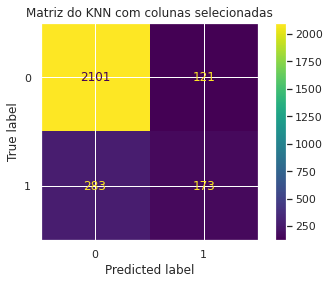

In [196]:
plot_confusion_matrix(KNN_colunas_selecionadas, X_test, y_test, values_format='d')
plt.title('Matriz do KNN com colunas selecionadas')

plt.show()

In [198]:
KNN_df_completo.fit(X2_train, y2_train)

KNeighborsClassifier(n_neighbors=7)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


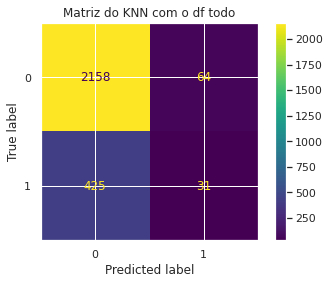

In [199]:
plot_confusion_matrix(KNN_df_completo, X2_test, y2_test, values_format='d')
plt.title('Matriz do KNN com o df todo')

plt.show()

Por fim, utilizo mais uma métrica para comparar agora os modelos oriundos do NB. Como é possível perceber, após fitar o necessário também, são expressos os scores de cada acurácia.  

In [200]:
NB_colunas_selecionadas.fit(X3_train, y3_train)

GaussianNB()

In [208]:
score1 = NB_colunas_selecionadas.score(X3_test, y3_test)
print(f'Acurácia NB_colunas_selecionadas: {score1*100:.2f}%')

Acurácia NB_colunas_selecionadas: 82.97%


In [203]:
NB_df_completo.fit(X4_train, y4_train)

GaussianNB()

In [209]:
score2 = NB_df_completo.score(X4_test, y4_test)
print(f'Acurácia NB_df_completo: {score2*100:.2f}%')

Acurácia NB_df_completo: 80.96%


E, mais uma vez, o modelo com as colunas selecionadas apresenta melhor métrica e acurácia, assim encerrando este projetinho. 

# Conclusão

Neste segundo pequeno projeto, busquei demonstrar o aprendido sobre limpeza e análise de um DataFrame.

Utilizei, também, os conhecimentos adquiridos nas aulas a respeito das bibliotecas de manipulação e análise de dados, além de noções sobre aprendizado supervisionado e métricas.

Após fazer a limpeza e análise dos dados, também buscando expressar mais dados de aspecto geral do df (concordando com o feedback do último projetinho),  percebi quais colunas seriam interessantes e as apliquei nos modelos de predição, simultaneamente comparando com os modelos preditórios com a maioria das colunas.

Como apresentado, além de buscar cumprir o exigido, esbocei também alguns testes e busquei demonstrar a habilidade de filtrar o que é aceitável ou não, como a percepção e ciência de que a substituição de todas as colunas categóricas para numéricas não obteve total êxito e lógica, ou a ineficiência do modelo de regressão linear por sua baixa acurácia neste caso.

Em suma, busquei limpar os dfs, diversificar e analisar os gráficos, explorando os Datasets e consolidando modelos de predição relevantes e ratificados por diferentes métricas além da acurácia. Fortalecendo, assim, a noção de Limpeza, Análise e Predição de Dados.